In [1]:
inputSize1 = [210.312, 133.858, 6.35, 10.16] #Example D.1
inputSize2 = [8.28, 5.27, 0.25, 0.4]

***좌측셀*** 에 계산할 부재의 사이즈를 입력하세요..

In [2]:
class HSection: ## 나중에 단면정보와 결합될 추가적 데이터 입력 용도로 미리 만들어둔 클래스입니다. 형상 정보 이외의 것들이 다른 셀에서 입력될 수 있으므로 2가지 이상 경로의 데이터를 합치는 용도로 사용됩니다
    def __init__(self, section):
        self.size = section
    
hsection1 = HSection(inputSize1)
hsection2 = HSection(inputSize2)
hsection1.size

[210.312, 133.858, 6.35, 10.16]

In [3]:
class Section_prop: ## HSection클래스의 인스턴스를 입력받아 작동하는 Section_prop(단면특성) 클래스 입니다.
    def __init__(self, hsection):
        self.d = hsection.size[0]
        self.bf = hsection.size[1]
        self.tw = hsection.size[2]
        self.tf = hsection.size[3]

In [4]:
class DesignBase:
    def __init__(self, secProp):
        self.secProp = secProp
        
    def find_Ag(self):
        d = self.secProp.d
        bf = self.secProp.bf
        tw = self.secProp.tw
        tf = self.secProp.tf
        
        return 2*tf*bf + (d-2*tf)*tw
    
    def find_An(self, db, boltN, gap): ## 볼트 직경을 인수로 전달
        self.db = db
        self.boltN= boltN 
        self.gap = gap
        An = self.find_Ag() - boltN*(db + gap)*self.secProp.tf
        return An
    
    def find_U(self, l, boltN):
        d = self.secProp.d
        bf = self.secProp.bf
        tw = self.secProp.tw
        tf = self.secProp.tf
        Ag = self.find_Ag()
        
        x = (bf*tf*tf/2 + (d/2 - tf)*tw*((d/2-tf)/2 + tf)) / (bf*tf + (d/2 - tf)*tw)
        u1 = (2*bf*tf) / Ag
        u2 = 1 - (x/l)
        
        
        
        
        
        
        if boltN >= 3:
            if bf < 2/3*d:
                u3 = 0.85
            else:
                u3 = 0.9
        else:
            u3 = 0
        
        return max(u1, u2, u3)
    
    def calc_Ae(self, db, l, boltN, gap):
        U =  self.find_U(l, boltN)
        return self.find_An(db, boltN, gap) * U

    
    
    
    
    
    
        
    def tensile_check(self, *args):  ## (Fy, Fu, [db, l, boltN, gap])
        if len(args) > 2:
            Fy = args[0]
            Fu = args[1]
            param_Ae = args[2]
            
            if len(param_Ae) != 4:
                return "오류! 계산에 필요한 인수가 적절하지 않습니다.(Fy, Fu, [db, l, boltN, gap])"
            else:
                pass
            
            db = param_Ae[0]
            length = param_Ae[1]
            boltN = param_Ae[2]
            gap = param_Ae[3]
            
            Φ1 = 0.9
            Φ2 = 0.75
            
            Ag = self.find_Ag()
            Ae = self.calc_Ae(db, length, boltN, gap)
            
            result = round(min(Φ1*Fy*Ag, Φ2*Fu*Ae),2)
            
            return result
            
        elif len(args) == 2:
            Fy = args[0]
            Fu = args[1]
            Φ1 = 0.9
            Φ2 = 0.75
            Ag = self.find_Ag()
            Ae = 0.75 * self.find_Ag()
            result = round(min(Φ1*Fy*Ag, Φ2*Fu*Ae),2)
            
            return result
        
        else:
            return "오류! 계산에 필요한 인수가 적절하지 않습니다.(Fy, Fu, [db, l, boltN, gap])"

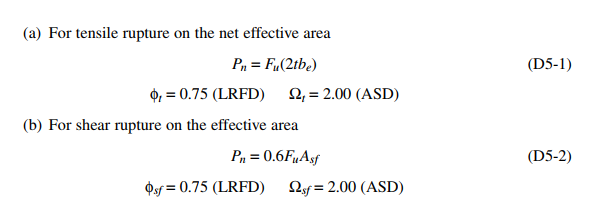

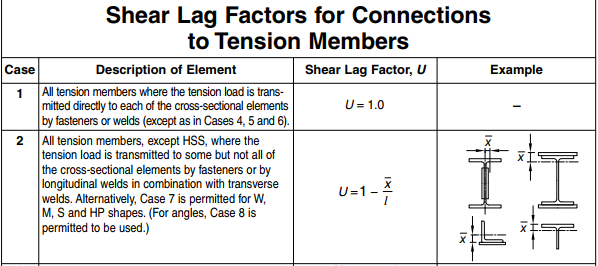

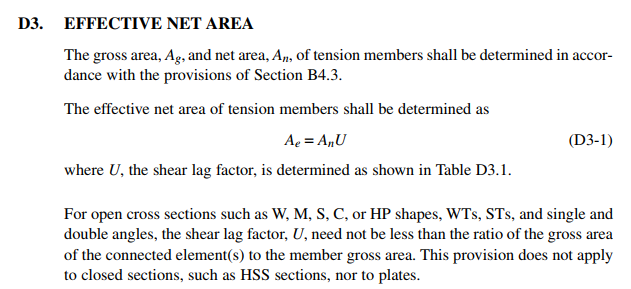

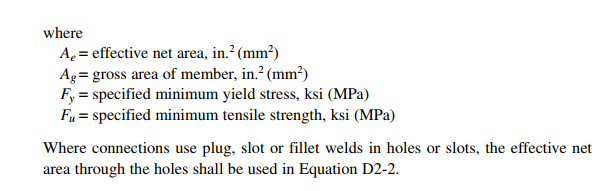

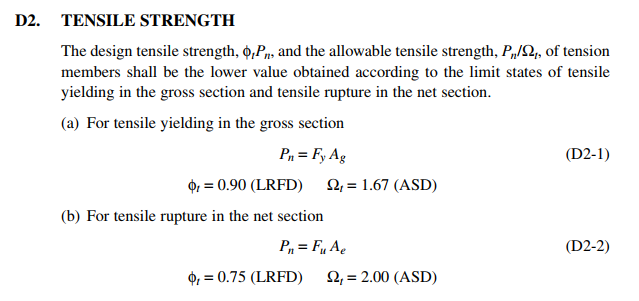

In [5]:
section_prop1 = Section_prop(hsection1)

  입력한 단면 사이즈에 따라 **섹션프로퍼티** 객체 생성

<br><br><br>

In [6]:
designBase1 = DesignBase(section_prop1)

  인장력 계산의 기반이 되는 **designBase** 객체 생성

<br><br><br>

In [7]:
designBase1.secProp.d

210.312

사이즈 확인

<br><br><br>

In [8]:
designBase1.find_Ag()

3926.44376

단면 gross area 확인

<br><br><br>

In [9]:
designBase1.find_U(228.6, 4)

0.9071073867163253

EFFECTIVE NET AREA 계산에 필요한 **[shear lag 계수 U]** 계산

<br><br><br>

In [10]:
designBase1.find_An(20.638, 4, 1.588)

3023.17912

볼트홀 공제된 net area 계산

<br><br><br>

In [11]:
designBase1.calc_Ae(20.638, 228.6, 4, 1.588)

2742.3481111185597

EFFECTIVE NET AREA 계산

<br><br><br>

In [12]:
designBase1.tensile_check(344.738, 448.159) ## 약산 모드

989815.0

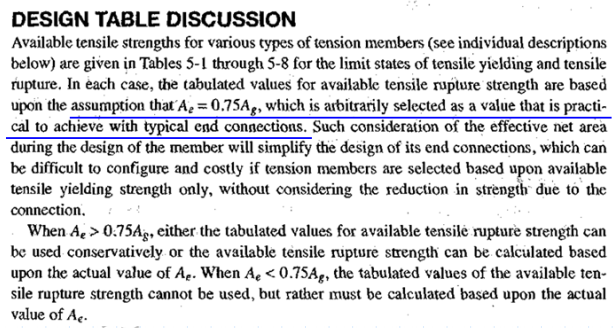

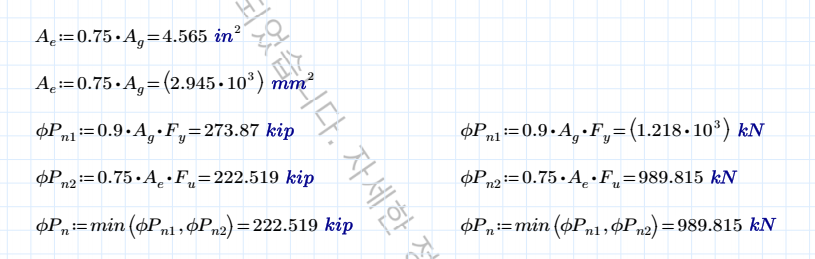

<br><br><br>

In [13]:
designBase1.tensile_check(344.738, 448.159, [20, 228, 4, 2]) ## 상세계산 모드

924307.2

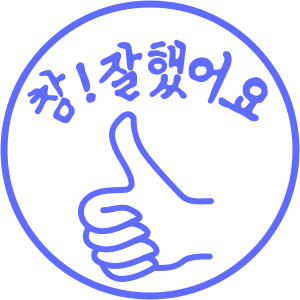

<br><br><br>

In [14]:
designBase1.tensile_check(344.738, 448.159, [20, 4, 2])

'오류! 계산에 필요한 인수가 적절하지 않습니다.(Fy, Fu, [db, l, boltN, gap])'

In [15]:
designBase1.tensile_check()

'오류! 계산에 필요한 인수가 적절하지 않습니다.(Fy, Fu, [db, l, boltN, gap])'

In [16]:
designBase1.tensile_check(448.159)

'오류! 계산에 필요한 인수가 적절하지 않습니다.(Fy, Fu, [db, l, boltN, gap])'